In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import re as re

In [4]:
losses = pd.read_csv('automobile-losses.csv')
risk = pd.read_csv('automobile-risk.csv')
spec = pd.read_csv('automobile-spec.csv')

In [93]:
losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [6]:
risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [7]:
spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# 1. JOIN 3 Tables using ID as key

In [8]:
join1 = pd.merge(losses, risk, how='outer', on ='ID')

In [9]:
join1.head()

,ID,normalized-losses,symboling
0,1,NaN,3
1,2,NaN,3
2,3,NaN,1
3,4,164.0,2
4,5,164.0,2


In [10]:
fulljoin = pd.merge(spec, join1, how='outer', on='ID')

In [11]:
fulljoin.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2


 # 2. Quick-look (dimension, data type, head/tail, summary statistics, etc) 

In [12]:
fulljoin.shape

(205, 27)

In [13]:
fulljoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-

In [14]:
fulljoin.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2


In [15]:
fulljoin.describe()

,ID,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000,164.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353,122.000000,0.834146
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342,35.442168,1.245307
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,65.000000,-2.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,94.000000,0.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,115.000000,1.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,150.000000,2.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,256.000000,3.000000


 # 3. Entify missing value. If any, how will you handle it?

In [16]:
fulljoin.isnull().sum()

ID                    0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
normalized-losses    41
symboling             0
dtype: int64

In [17]:
fulljoin['num-of-doors'].fillna(fulljoin['num-of-doors'].mode()[0], inplace=True)

In [18]:
fulljoin['bore'].fillna(fulljoin['bore'].mean(), inplace=True)

In [19]:
fulljoin['stroke'].fillna(fulljoin['stroke'].mean(), inplace=True)

In [20]:
fulljoin['peak-rpm'].fillna(fulljoin['peak-rpm'].mean(), inplace=True)

In [21]:
fulljoin['price'].fillna(fulljoin['price'].mean(), inplace=True)

In [87]:
fulljoin['normalized-losses'].fillna(fulljoin['normalized-losses'].mean(), inplace=True)

In [91]:
fulljoin['horsepower'].fillna(fulljoin['normalized-losses'].mean(), inplace=True)

In [92]:
fulljoin.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
normalized-losses    0
symboling            0
dtype: int64

# 4.  Perform visualization using at least 5 difference visualization technique (barplot, scatter 

## Scatterplot

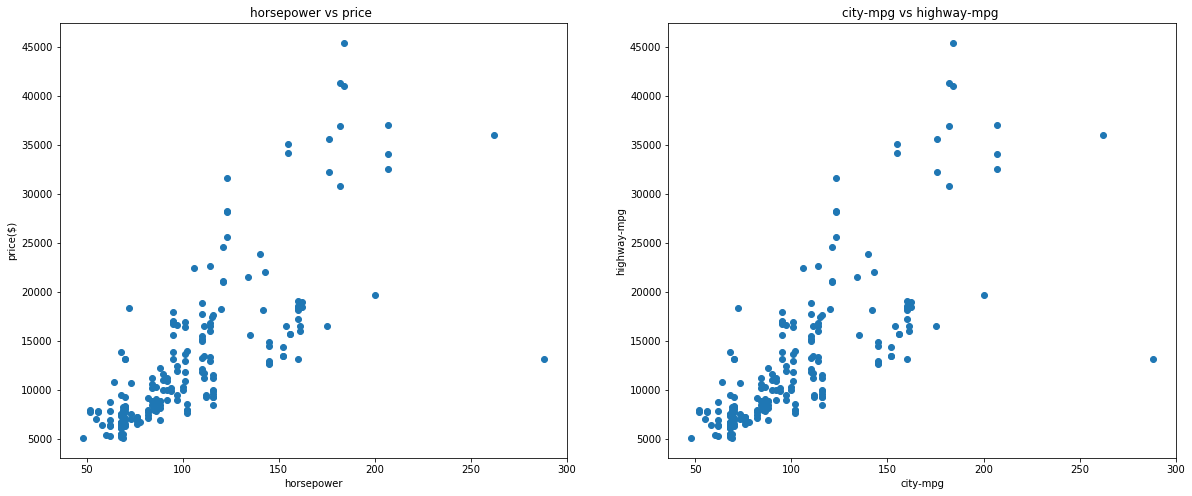

In [24]:
f=plt.figure(figsize=(20,8))

f.add_subplot(1,2,1)
horse_price= plt.scatter(fulljoin['horsepower'],fulljoin['price'])
plt.title('horsepower vs price ')
plt.xlabel('horsepower')
plt.ylabel('price($)')

f.add_subplot(1,2,2)
horse_price= plt.scatter(fulljoin['horsepower'],fulljoin['price'])
plt.title('city-mpg vs highway-mpg ')
plt.xlabel('city-mpg')
plt.ylabel('highway-mpg')
plt.show()

## Histogram

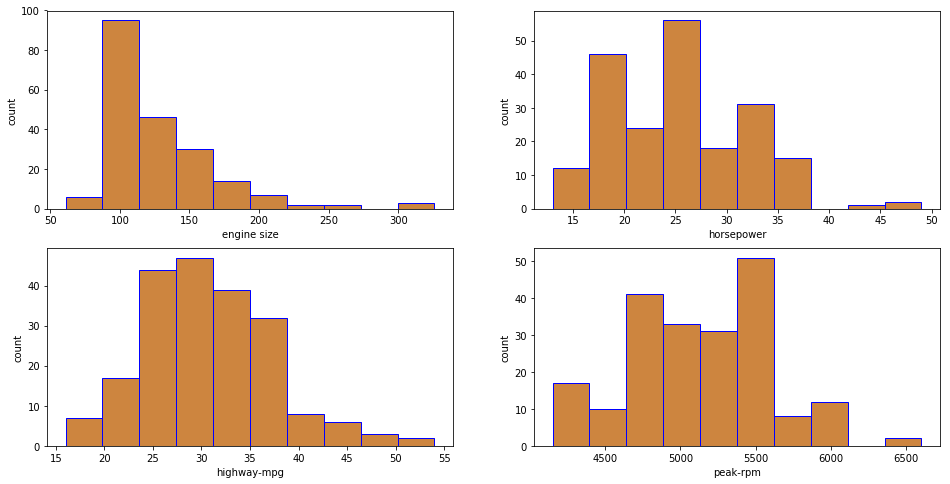

In [139]:
f=plt.figure(figsize=(16,8))

f.add_subplot(2,2,1)
histo_engine= plt.hist(fulljoin['engine-size'],
         facecolor='peru', 
         edgecolor='blue', 
         bins=10)
plt.xlabel('engine size')
plt.ylabel('count')

f.add_subplot(2,2,2)
histo_price = plt.hist(fulljoin['city-mpg'], 
         facecolor='peru', 
         edgecolor='blue', 
         bins=10)
plt.xlabel('horsepower')
plt.ylabel('count')

f.add_subplot(2,2,3)
histo_price = plt.hist(fulljoin['highway-mpg'], 
         facecolor='peru', 
         edgecolor='blue', 
         bins=10)
plt.xlabel('highway-mpg')
plt.ylabel('count')

f.add_subplot(2,2,4)
histo_peakrpm = plt.hist(fulljoin['peak-rpm'], 
         facecolor='peru', 
         edgecolor='blue', 
         bins=10)
plt.xlabel('peak-rpm')
plt.ylabel('count')

plt.show()

## Barplot

Text(0,0.5,'count')

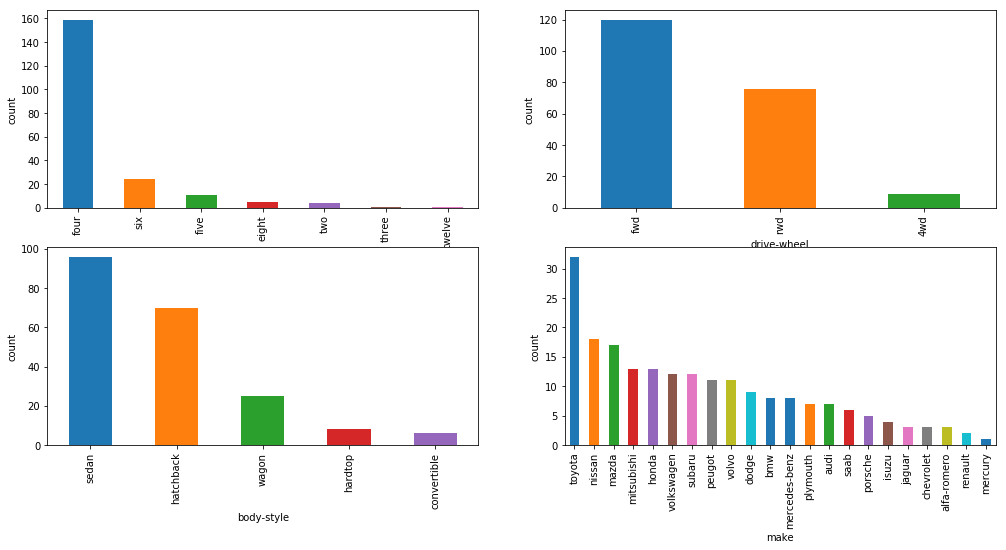

In [124]:
f=plt.figure(figsize=(17,8))

f.add_subplot(2,2,1)
barplot_make = fulljoin['cylinder'].value_counts().plot(kind='bar');
plt.xlabel('cylinder')
plt.ylabel('count')

f.add_subplot(2,2,2)
barplot_make = fulljoin['drive-wheel'].value_counts().plot(kind='bar');
plt.xlabel('drive-wheel')
plt.ylabel('count')

f.add_subplot(2,2,3)
barplot_make = fulljoin['body-style'].value_counts().plot(kind='bar');
plt.xlabel('body-style')
plt.ylabel('count')

f.add_subplot(2,2,4)
barplot_make = fulljoin['make'].value_counts().plot(kind='bar');
plt.xlabel('make')
plt.ylabel('count')

## Boxplot

Text(0.5,1,'Boxplot - Bore')

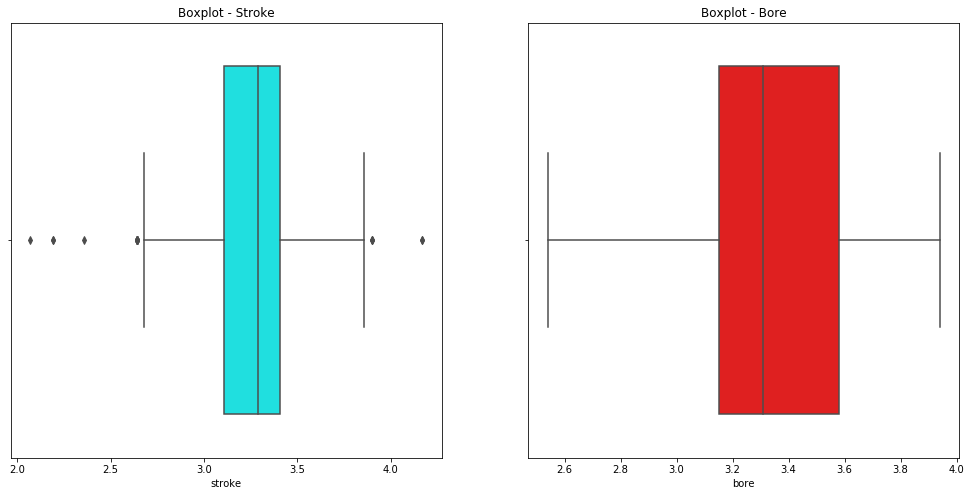

In [121]:
f=plt.figure(figsize=(17,8))

f.add_subplot(1,2,1)
sns.boxplot(data = fulljoin, x = 'stroke', color = 'cyan', orient = "h").set_title('Boxplot - Stroke')

f.add_subplot(1,2,2)
sns.boxplot(data = fulljoin, x = 'bore', color = 'red', orient = "h").set_title('Boxplot - Bore')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

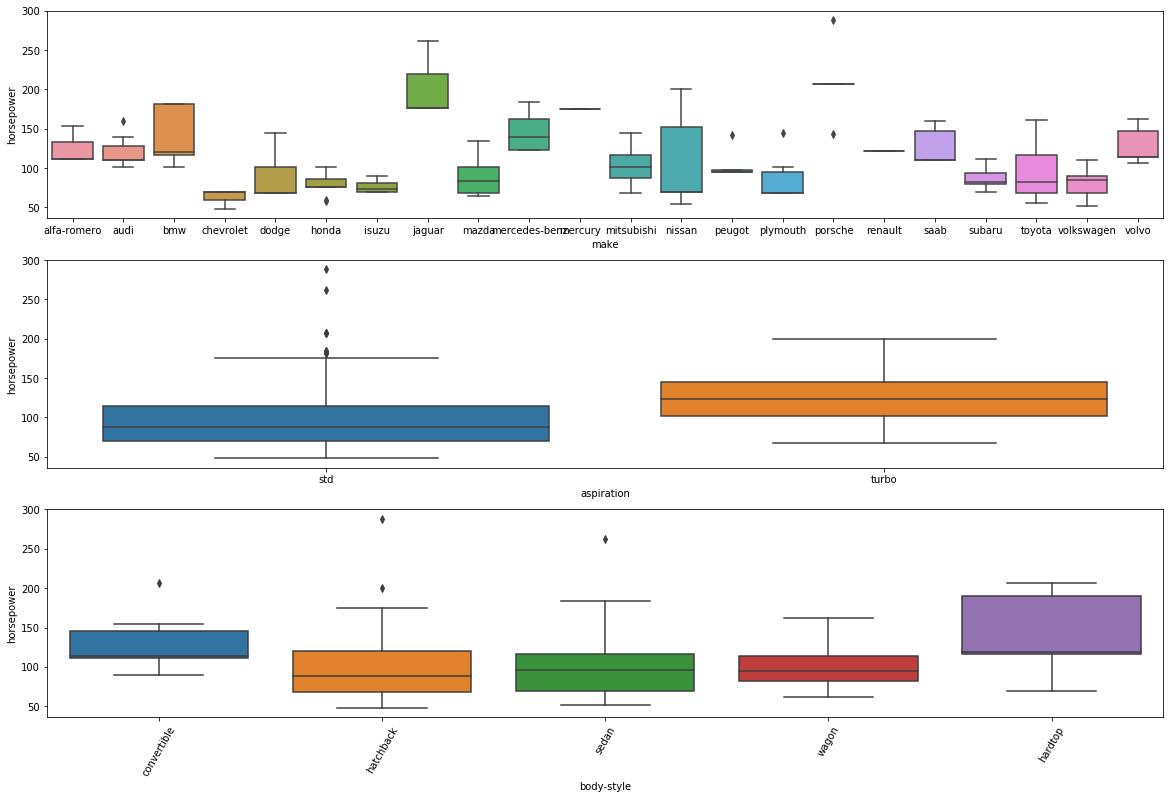

In [122]:
f=plt.figure(figsize=(20,13))
f.add_subplot(3,1,1)
g = sns.boxplot(y=fulljoin["horsepower"], x=fulljoin['make'])
f.add_subplot(3,1,2)
g = sns.boxplot(y=fulljoin["horsepower"], x=fulljoin['aspiration'])
f.add_subplot(3,1,3)
g = sns.boxplot(y=fulljoin["horsepower"], x=fulljoin['body-style'])
plt.xticks(rotation=60)

## Stackplot

In [114]:
x = fulljoin['make']

In [115]:
y = np.vstack([fulljoin['horsepower'],
               fulljoin['city-mpg']]) 

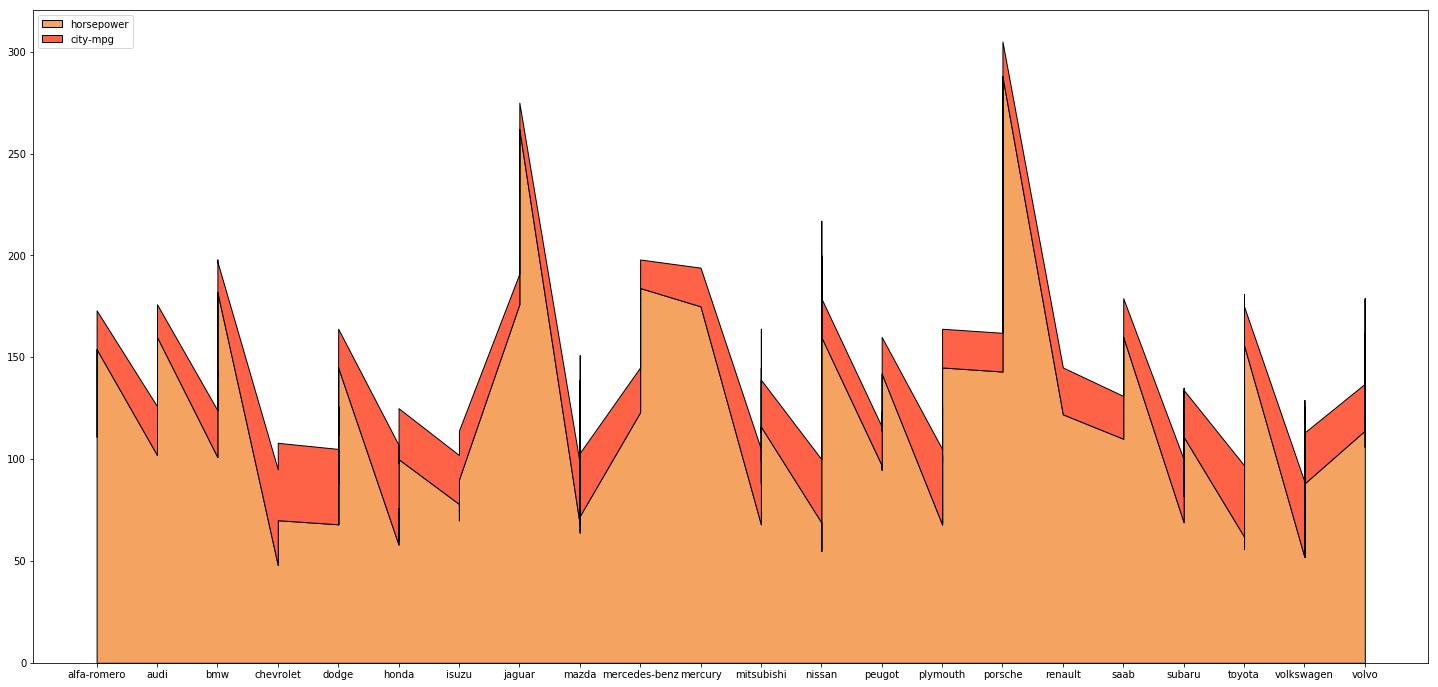

In [116]:
plt.figure(figsize=(25,12))
# Labels for each stack
labels = ['horsepower', 
          'city-mpg', 
          ]

# Colors for each stack
colors = ['sandybrown', 
          'tomato', 
          'skyblue']

#  Similar to pandas df.plot.area()
plt.stackplot(x, y, 
              labels=labels,
              colors=colors, 
              edgecolor='black')

# Plots legend to the upperleft of Figure
plt.legend(loc=2)

plt.show()

## Correlation

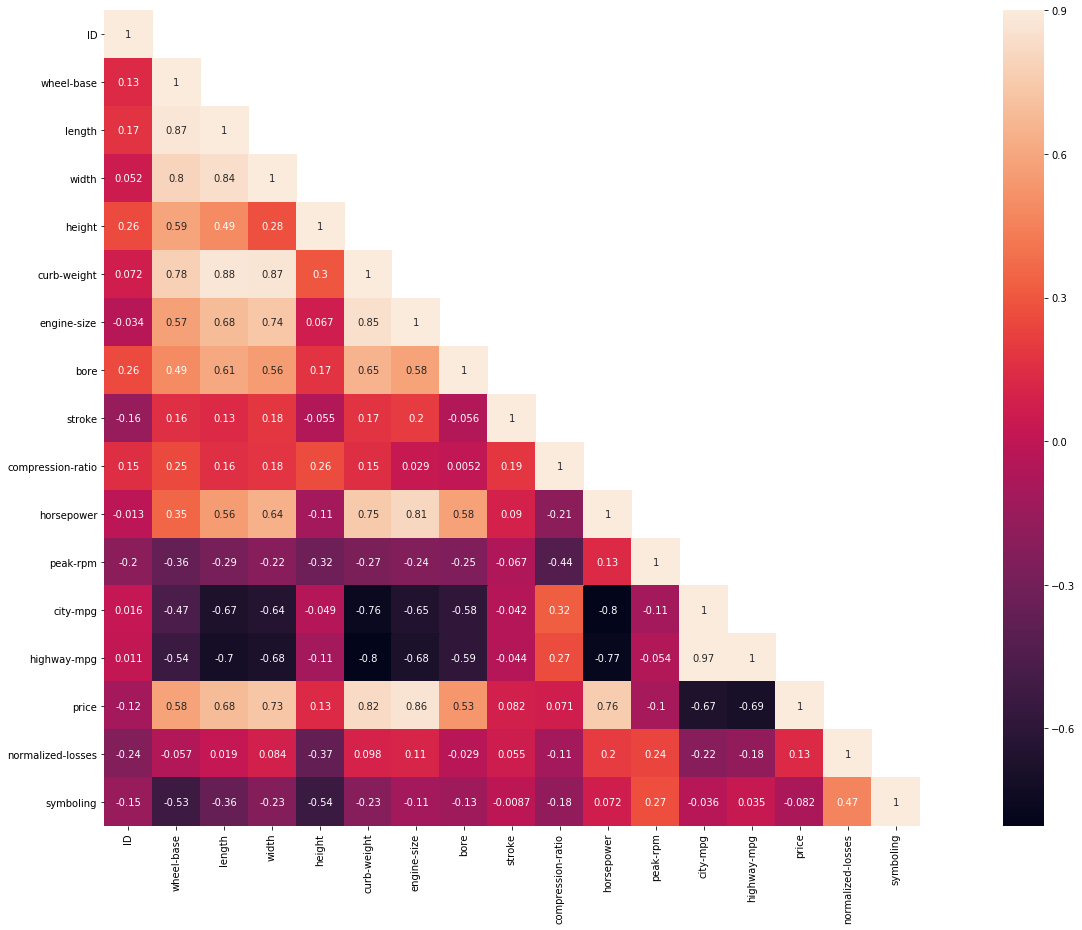

In [34]:
#create correlation with hitmap

#create correlation
corr = fulljoin.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(30,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

# PART 2

# 1.  Car brand with highest price

In [123]:
carbrand= fulljoin.groupby('make')
higgest_price = carbrand['price'].max()
higgest_price.head(3)

make
alfa-romero    16500.0
audi           23875.0
bmw            41315.0
Name: price, dtype: float64

# 2. Maximum horsepower for car with 6 cylinder engine 

In [109]:
six_cylinder = fulljoin[fulljoin.cylinder == 'six']
max_cylinder = six_cylinder['horsepower'].max()
max_cylinder

207.0

# 3. Average peak-rpm for ‘turbo’ style aspiration car 

In [111]:
turbo_style = fulljoin[fulljoin.aspiration == 'turbo']
avg_turbo = turbo_style['peak-rpm'].mean()
avg_turbo

4939.189189189189

# 4. Average price based on body-style

In [115]:
bodystyle = fulljoin.groupby('body-style')
avg_price = bodystyle['price'].mean()
avg_price

body-style
convertible    21890.500000
hardtop        22208.500000
hatchback      10050.289410
sedan          14433.658945
wagon          12371.960000
Name: price, dtype: float64

# 5. Average price based on body-style only for Honda car (make=Honda)

In [129]:
onlyhonda = fulljoin[fulljoin.make == 'honda']
bodystyle = onlyhonda.groupby('body-style')
avg_price_honda = bodystyle['price'].mean()
avg_price_honda

body-style
hatchback    7054.428571
sedan        9945.000000
wagon        7295.000000
Name: price, dtype: float64